<a href="https://colab.research.google.com/github/thenukii/ML-CW/blob/main/Copy_of_DataPreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [ ]:
X["income"] = y

# Creating Dataframe

In [ ]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
X.shape

(48842, 15)

In [ ]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
X['income'].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

In [ ]:
X['sex'].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [ ]:
X['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [ ]:
X['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [ ]:
X['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [ ]:
# Here we will check the missing values in our dataset
X.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

# Replacing ? with Mode

In [ ]:
X.replace('?', np.NaN,inplace = True)
X.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
row_with_question_mark = X.iloc[27]
print("Row containing '?' after replace Nan:")
print(row_with_question_mark)

Row containing '?' after replace Nan:
age                               54
workclass                        NaN
fnlwgt                        180211
education               Some-college
education-num                     10
marital-status    Married-civ-spouse
occupation                       NaN
relationship                 Husband
race              Asian-Pac-Islander
sex                             Male
capital-gain                       0
capital-loss                       0
hours-per-week                    60
native-country                 South
income                          >50K
Name: 27, dtype: object


In [ ]:
mode_values = X.mode().iloc[0]
X.fillna(mode_values, inplace=True)

In [ ]:
row_with_Nan = X.iloc[27]
print("Row containing 'Nan' after replace mode:")
print(row_with_Nan)

Row containing 'Nan' after replace mode:
age                               54
workclass                    Private
fnlwgt                        180211
education               Some-college
education-num                     10
marital-status    Married-civ-spouse
occupation            Prof-specialty
relationship                 Husband
race              Asian-Pac-Islander
sex                             Male
capital-gain                       0
capital-loss                       0
hours-per-week                    60
native-country                 South
income                          >50K
Name: 27, dtype: object


# Remove Duplicates

In [ ]:
# Check for duplicates in the DataFrame
total_duplicates = X.duplicated().sum()

# Display the total number of duplicate rows
print("Total duplicate rows found:", total_duplicates)


Total duplicate rows found: 29


In [ ]:
# Remove duplicates from the DataFrame
X = X.drop_duplicates()

In [ ]:
# Check for duplicates in the DataFrame
total_duplicates = X.duplicated().sum()

# Display the total number of duplicate rows
print("Total duplicate rows found:", total_duplicates)


Total duplicate rows found: 0


# Replace the <=50K. with <=50K and >50K. with >50K

In [ ]:
X["income"] = X['income'].str.replace('<=50K.', '<=50K' )
X["income"] = X['income'].str.replace('>50K.', '>50K' )

<ipython-input-259-b6265caa2af9>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  X["income"] = X['income'].str.replace('<=50K.', '<=50K' )
<ipython-input-259-b6265caa2af9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["income"] = X['income'].str.replace('<=50K.', '<=50K' )
<ipython-input-259-b6265caa2af9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  X["income"] = X['income'].str.replace('>50K.', '>50K' )
<ipython-input-259-b6265caa2af9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [ ]:
X['income'].value_counts()

<=50K    37128
>50K     11685
Name: income, dtype: int64

# How values ​​change with income

<Figure size 800x600 with 0 Axes>

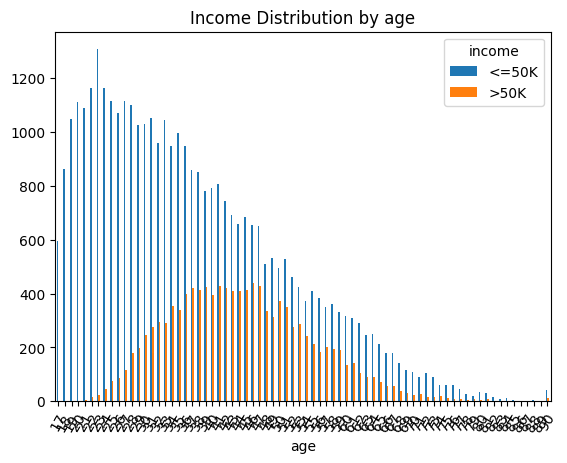

<Figure size 800x600 with 0 Axes>

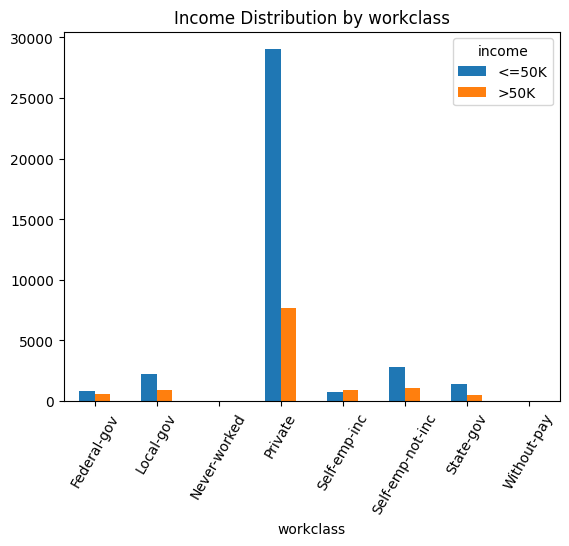

<Figure size 800x600 with 0 Axes>

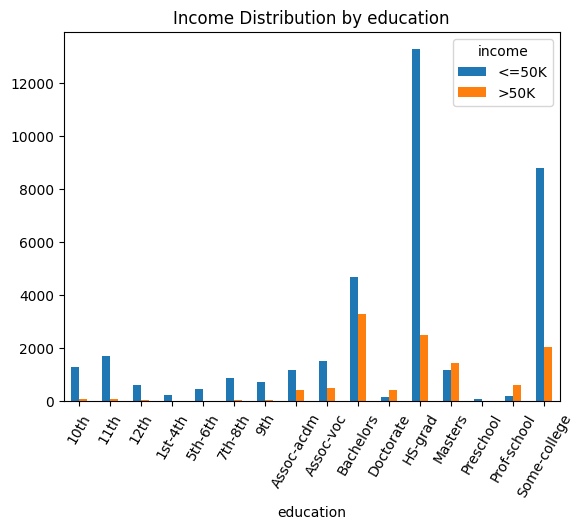

<Figure size 800x600 with 0 Axes>

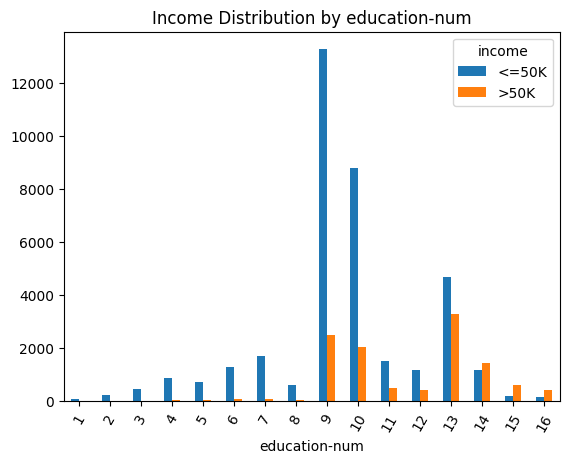

<Figure size 800x600 with 0 Axes>

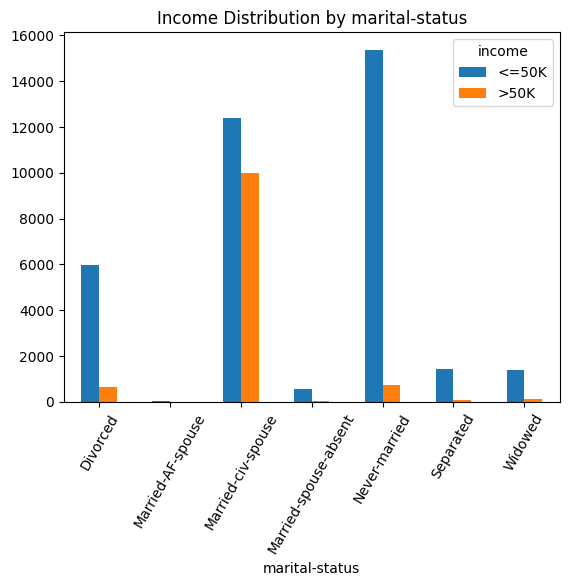

<Figure size 800x600 with 0 Axes>

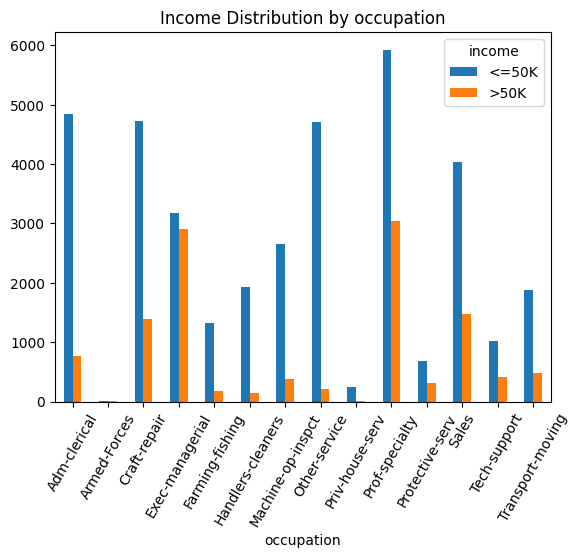

<Figure size 800x600 with 0 Axes>

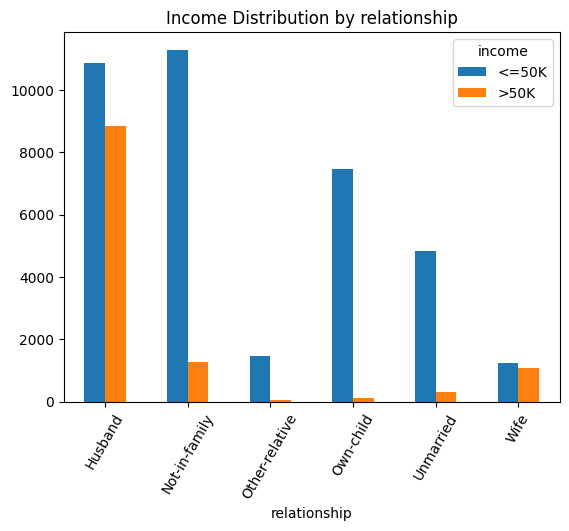

<Figure size 800x600 with 0 Axes>

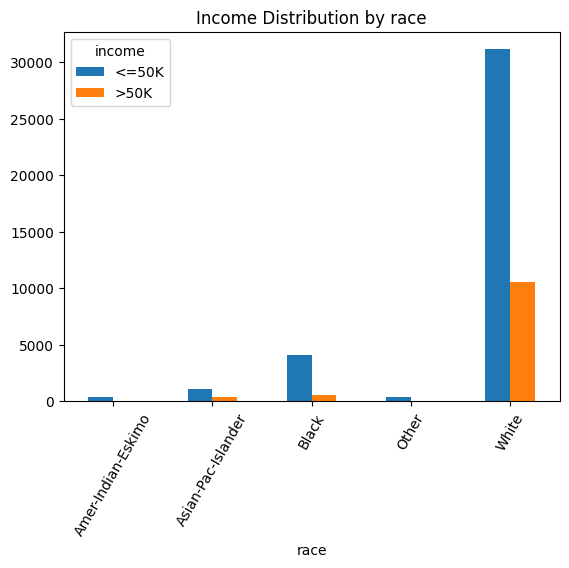

<Figure size 800x600 with 0 Axes>

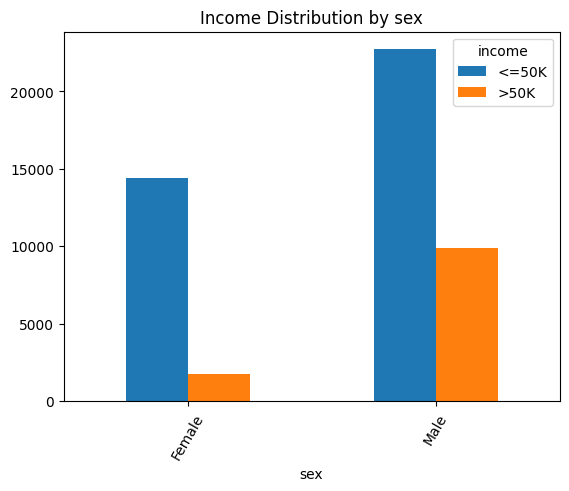

<Figure size 800x600 with 0 Axes>

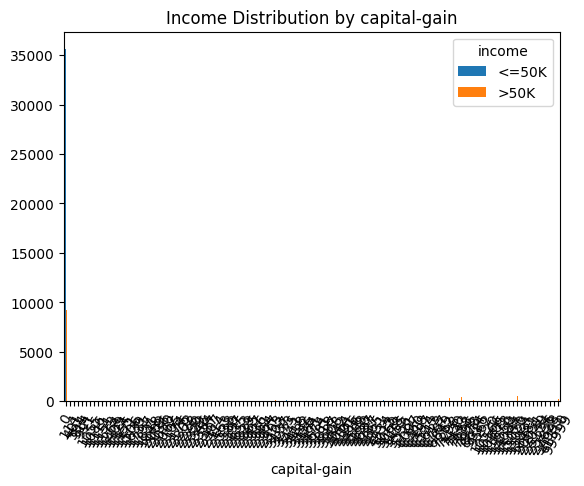

<Figure size 800x600 with 0 Axes>

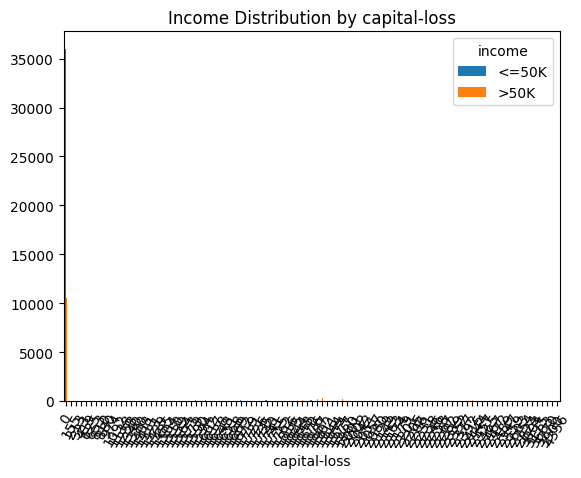

<Figure size 800x600 with 0 Axes>

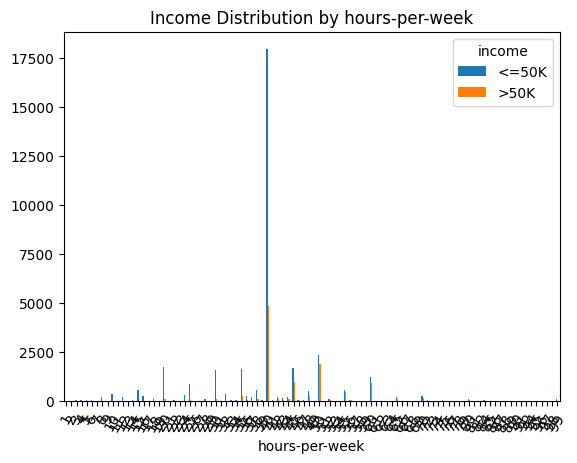

<Figure size 800x600 with 0 Axes>

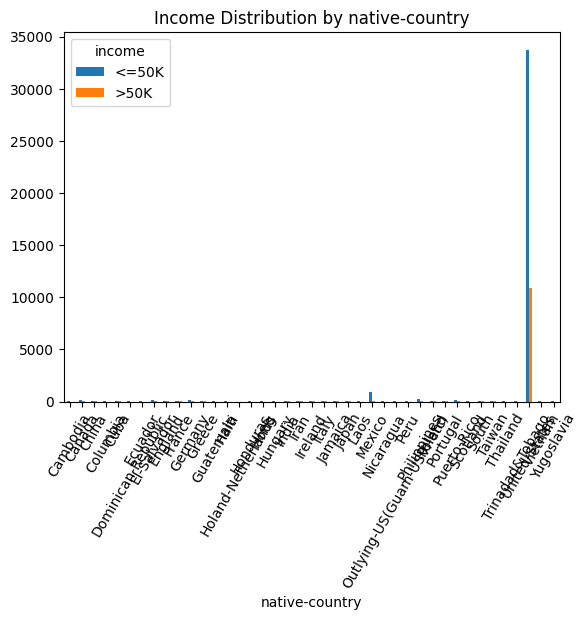

In [ ]:
features = ["age","workclass","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week" ,"native-country"]

# Create boxplots for each feature
for feature in features:
    plt.figure(figsize=(8, 6))
    pd.crosstab(X[feature], X['income']).plot(kind='bar')
    plt.title(f'Income Distribution by {feature}')
    plt.xticks(rotation=60)
    plt.show()

# Remove Outliers

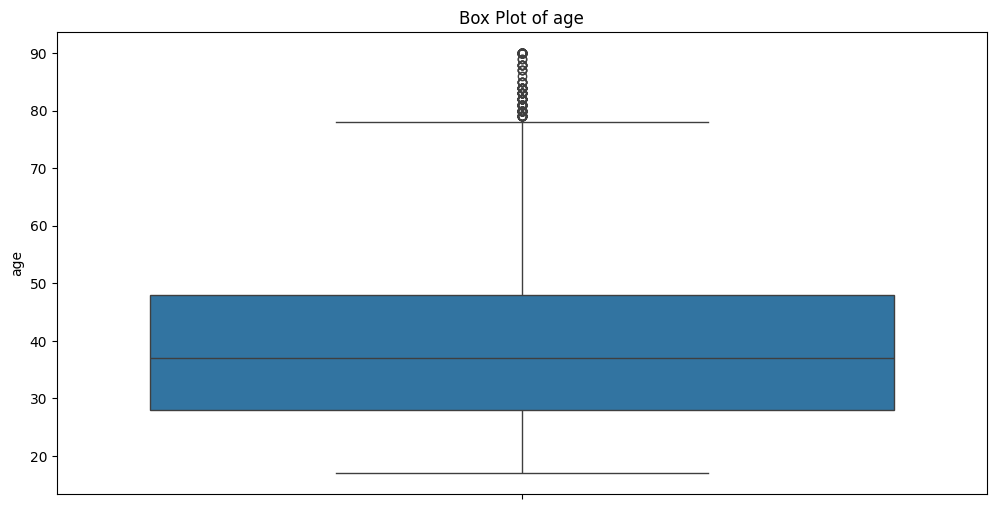

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X['age'])
plt.title("Box Plot of age")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from os import X_OK
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = X['age'].quantile(0.25)
Q3 = X['age'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'age' column
X_without_outliers = X[(X['age'] >= lower_bound) & (X['age'] <= upper_bound)]



In [ ]:
# Display the shape of the original and filtered DataFrame
print("Original DataFrame shape:", X.shape)
print("Filtered DataFrame shape:", X_without_outliers.shape)


Original DataFrame shape: (48813, 15)
Filtered DataFrame shape: (48598, 15)


# Grouping

In [ ]:
#martial status
X['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent'], 'Married' , inplace = True , regex = True)
X['marital-status'].replace(['Divorced', 'Never-married', 'Separated'], 'Not-Married' , inplace = True , regex = True)
X['marital-status'].replace(['Widowed'], 'Widowed' , inplace = True , regex = True)


<ipython-input-265-04eb2c4e5a58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent'], 'Married' , inplace = True , regex = True)
<ipython-input-265-04eb2c4e5a58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['marital-status'].replace(['Divorced', 'Never-married', 'Separated'], 'Not-Married' , inplace = True , regex = True)
<ipython-input-265-04eb2c4e5a58>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
#workclass
X['workclass'].replace(['Private'], 'Private' , inplace = True , regex = True)
X['workclass'].replace(['Self-emp-not-inc', 'Self-emp-inc'], 'Self-Employed' , inplace = True , regex = True)
X['workclass'].replace(['Federal-gov', 'Local-gov', 'State-gov'], 'Government' , inplace = True , regex = True)
X['workclass'].replace(['Without-pay', 'Never-worked'], 'Not-Employed' , inplace = True , regex = True)

<ipython-input-266-5f0a06fc80b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['workclass'].replace(['Private'], 'Private' , inplace = True , regex = True)
<ipython-input-266-5f0a06fc80b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['workclass'].replace(['Self-emp-not-inc', 'Self-emp-inc'], 'Self-Employed' , inplace = True , regex = True)
<ipython-input-266-5f0a06fc80b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['w

In [ ]:
# Define categories for hours per week
X['hours-per-week'] = pd.cut(X['hours-per-week'], bins=[0,34,40,99], labels=['Part-time', 'Full-time', 'Over-time'])


<ipython-input-267-7da317f481fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['hours-per-week'] = pd.cut(X['hours-per-week'], bins=[0,34,40,99], labels=['Part-time', 'Full-time', 'Over-time'])


In [ ]:
# education Category
X["education"].replace(['Preschool'], 'Pre-school', inplace = True , regex = True)
X["education"].replace(['1st-4th', '5th-6th'], 'Elementary-School' , inplace = True , regex = True)
X["education"].replace(['7th-8th'], 'Middle-School' , inplace = True , regex = True)
X["education"].replace(['9th', '10th', '11th', '12th', 'HS-grad'], 'High-School' , inplace = True , regex = True)
X["education"].replace(['Some-college', 'Assoc-acdm', 'Assoc-voc'], 'College' , inplace = True , regex = True)
X["education"].replace(['Bachelors'], 'Bachelors' , inplace = True , regex = True)
X["education"].replace(['Masters' ,'Prof-school'], 'Masters' , inplace = True , regex = True)
X["education"].replace(['Doctorate'], 'Doctorate' , inplace = True , regex = True)

<ipython-input-268-dca731086afb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["education"].replace(['Preschool'], 'Pre-school', inplace = True , regex = True)
<ipython-input-268-dca731086afb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["education"].replace(['1st-4th', '5th-6th'], 'Elementary-School' , inplace = True , regex = True)
<ipython-input-268-dca731086afb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["educati

In [ ]:
# occupation Category
X["occupation"].replace(['Tech-support' ,'Prof-specialty'], 'Professional', inplace = True , regex = True)
X["occupation"].replace(['Craft-repair', 'Handlers-cleaners' , 'Machine-op-inspct' ,'Farming-fishing' ,'Transport-moving'], 'Skilled' , inplace = True , regex = True)
X["occupation"].replace(['Other-service' ,'Priv-house-serv' ,'Protective-serv'], 'Service' , inplace = True , regex = True)
X["occupation"].replace(['Sales'], 'Sales' , inplace = True , regex = True)
X["occupation"].replace(['Exec-managerial'], 'Executive' , inplace = True , regex = True)
X["occupation"].replace(['Executive'], 'Admin' , inplace = True , regex = True)
X["occupation"].replace(['Armed-Forces'], 'Military' , inplace = True , regex = True)


<ipython-input-269-ddccf39ee6cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["occupation"].replace(['Tech-support' ,'Prof-specialty'], 'Professional', inplace = True , regex = True)
<ipython-input-269-ddccf39ee6cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["occupation"].replace(['Craft-repair', 'Handlers-cleaners' , 'Machine-op-inspct' ,'Farming-fishing' ,'Transport-moving'], 'Skilled' , inplace = True , regex = True)
<ipython-input-269-ddccf39ee6cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
for column in X:
  print(column)
  print(X[column].unique())
  print('\n')


age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


workclass
['Government' 'Self-Employed' 'Private' 'Not-Employed']


fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]


education
['Bachelors' 'High-School' 'Masters' 'College' 'Middle-School' 'Doctorate'
 'Elementary-School' 'Pre-school']


education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


marital-status
['Not-Married' 'Married' 'Widowed']


occupation
['Adm-clerical' 'Admin' 'Skilled' 'Professional' 'Service' 'Sales'
 'Military']


relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']


race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']


sex
['Male' 'Female']


capital-gain
[ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['workclass'] = le.fit_transform(X['workclass'])
X['education'] = le.fit_transform(X['education'])
X['marital-status'] = le.fit_transform(X['marital-status'])
X['hours-per-week'] = le.fit_transform(X['hours-per-week'])
X['occupation'] = le.fit_transform(X['occupation'])
X['relationship'] = le.fit_transform(X['relationship'])
X['race'] = le.fit_transform(X['race'])
X['sex'] = le.fit_transform(X['sex'])
X['native-country'] = le.fit_transform(X['native-country'])
X['income'] = le.fit_transform(X['income'])

<ipython-input-271-1681d72d8e0e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['workclass'] = le.fit_transform(X['workclass'])
<ipython-input-271-1681d72d8e0e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['education'] = le.fit_transform(X['education'])
<ipython-input-271-1681d72d8e0e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

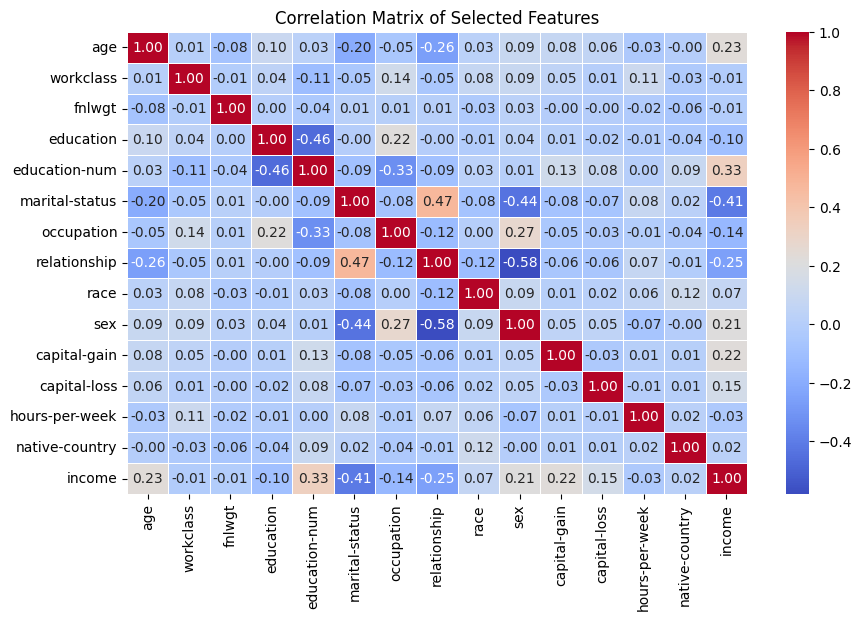

In [ ]:
correlation_matrix = X.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [ ]:
# Drop the 'fnlwgt' column from the DataFrame
X = X.drop(columns=['fnlwgt'], axis = 1)
X.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,0,13,1,0,1,4,1,2174,0,0,38,0
1,50,3,0,13,0,1,0,4,1,0,0,2,38,0
2,38,2,4,9,1,6,1,4,1,0,0,0,38,0
3,53,2,4,7,0,6,0,2,1,0,0,0,38,0
4,28,2,0,13,0,3,5,2,0,0,0,0,4,0


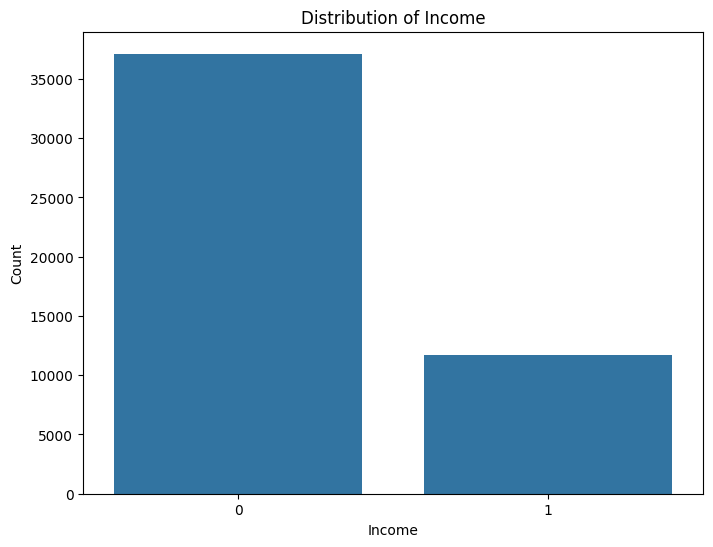

In [ ]:
# Plot the distribution of 'income'
plt.figure(figsize=(8, 6))
sns.countplot(data=X, x='income')
plt.title("Distribution of Income")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

# Over Sampling



In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Separate features and target variable
Y = X['income']
X = X.drop(columns=['income'])


# Apply SMOTE to balance the DataFrame
X_resampled, y_resampled = smote.fit_resample(X, Y)

# Create a new balanced DataFrame
X = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                         pd.DataFrame(y_resampled, columns=['income'])], axis=1)

# Display the shape of the balanced DataFrame
print("Balanced DataFrame shape:", X.shape)


Balanced DataFrame shape: (74256, 14)


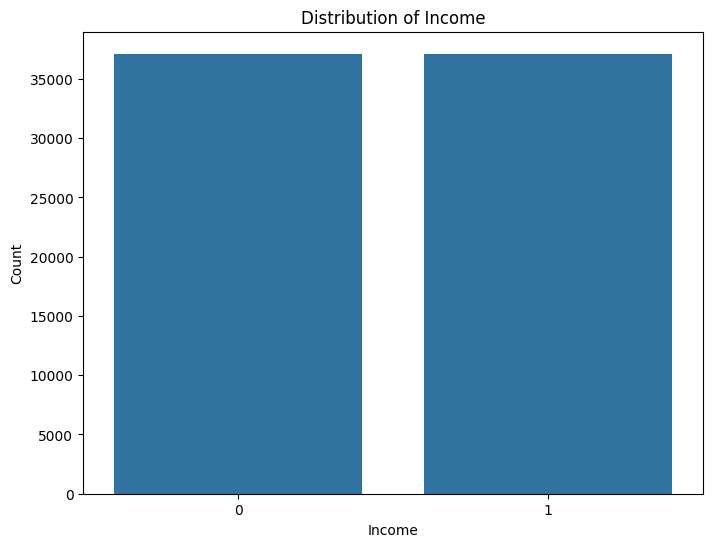

In [ ]:
# Plot the distribution of 'income'
plt.figure(figsize=(8, 6))
sns.countplot(data=X, x='income')
plt.title("Distribution of Income")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

# Split the dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=['income']), X['income'], test_size=0.2, random_state=42)

# Model Train Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict on the test set
nb_predictions = nb_classifier.predict(X_test)

# Evaluate the classifier
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_report = classification_report(y_test, nb_predictions)

# Display evaluation metrics
print("Naive Bayes Classifier:")
print("Accuracy:", nb_accuracy)
print("Classification Report:")
print(nb_report)

Naive Bayes Classifier:
Accuracy: 0.6918933476972798
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.93      0.75      7489
           1       0.86      0.45      0.59      7363

    accuracy                           0.69     14852
   macro avg       0.75      0.69      0.67     14852
weighted avg       0.75      0.69      0.67     14852



# Confusion Matrix for Naive bayes classifier

In [ ]:
# Compute confusion matrix for Naive Bayes classifier
nb_cm = confusion_matrix(y_test, nb_predictions)

# Plot confusion matrix for Naive Bayes classifier
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues", xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.title("Confusion Matrix - Naive Bayes Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC curve for Naive Bayes classifier

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve for Naive Bayes classifier
nb_probs = nb_classifier.predict_proba(X_test)[:, 1]
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

# Plot ROC curve for Naive Bayes classifier
plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, label=f"Naive Bayes (AUC = {nb_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.title('ROC Curve - Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

# Model Train Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

# Print the evaluation metrics
print("Random Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("Classification Report:")
print(rf_report)



Random Forest Classifier:
Accuracy: 0.8743603555076758
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      7489
           1       0.85      0.91      0.88      7363

    accuracy                           0.87     14852
   macro avg       0.88      0.87      0.87     14852
weighted avg       0.88      0.87      0.87     14852



# Confusion Matrix for Random Forest Classifier

In [ ]:
# Compute confusion matrix for Random Forest classifier
rf_cm = confusion_matrix(y_test, rf_predictions)

# Plot confusion matrix for Random Forest classifier
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC curve for Random Forest classifier

In [ ]:
# Compute ROC curve for Random Forest classifier
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# Plot ROC curve for Random Forest classifier
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()